In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, quantile_transform
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv(r'E:/MBAN/Sem II/Predictive Modeling/Predictive Modeling/For Hackathon/data_set_hackathon.csv')

In [65]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


In [67]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')

In [95]:
df['items'] = pd.to_numeric(df['items'], errors='coerce')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   object        
 10  Route                    2420 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 208.1+ KB


In [69]:
nan_values = df.isna().sum()
print("NaN values per column:")
print(nan_values)

NaN values per column:
order_date                 0
requested_delivery_date    0
Customer Country Code      0
Product Code               0
Description                0
order_type                 0
Customer Order Code        0
value                      0
Curr                       0
items                      0
Route                      0
dtype: int64


In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2417 non-null   datetime64[ns]
 1   requested_delivery_date  2417 non-null   datetime64[ns]
 2   Customer Country Code    2417 non-null   object        
 3   Product Code             2417 non-null   object        
 4   Description              2417 non-null   object        
 5   order_type               2417 non-null   object        
 6   Customer Order Code      2417 non-null   int64         
 7   value                    2417 non-null   float64       
 8   Curr                     2417 non-null   object        
 9   items                    2417 non-null   object        
 10  Route                    2417 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 226.6+ KB


In [72]:
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Delivery Month'] = df['requested_delivery_date'].dt.month
df['Season'] = df['Delivery Month'].apply(month_to_season)

df['Lead Time'] = (df['requested_delivery_date'] - df['order_date']).dt.days

df['advanced_order'] = (df['Lead Time'] >= 30).astype(int)

df['Season_Num'] = df['Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})

In [ ]:
#df['Estimated_Price'] = df.groupby('Product Code')['value'].transform(lambda x: x.shift().expanding().mean())
#df['Estimated_Price'].fillna(df.groupby('Product Code')['value'].transform('mean'), inplace=True)
#df[['order_date', 'Product Code', 'value', 'Estimated_Price']].head(50)


In [73]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,2,Winter,217,1,1
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,2,Winter,217,1,1
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,2,Winter,217,1,1
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,2,Winter,217,1,1


In [74]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1


In [75]:
df['year_month'] = df['order_date'].dt.to_period('M')

In [76]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,2,Winter,217,1,1,2011-07
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,2,Winter,217,1,1,2011-07


In [77]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07


In [78]:
# Count distinct Customer Order Codes for each month
monthly_orders = df.groupby('year_month')['Customer Order Code'].nunique().reset_index()
monthly_orders.columns = ['year_month', 'Distinct Orders']

In [79]:
# Convert 'YearMonth' to datetime format for time series analysis
monthly_orders['year_month'] = pd.to_datetime(monthly_orders['year_month'].astype(str))
monthly_orders.set_index('year_month', inplace=True)

In [80]:
monthly_orders

,Distinct Orders
year_month,
2009-07-01,38
2009-08-01,9
2009-09-01,12
2009-10-01,4
2009-11-01,2
2009-12-01,21
2010-01-01,29
2010-02-01,36
2010-03-01,43


In [81]:
# Step 3: Check Stationarity using Augmented Dickey-Fuller (ADF) Test
result = adfuller(monthly_orders['Distinct Orders'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is not stationary. Differencing will be applied.")
    monthly_orders['Distinct Orders Diff'] = monthly_orders['Distinct Orders'].diff().dropna()

ADF Statistic: -3.401828886628718
p-value: 0.01089668276847126


In [82]:
monthly_orders

,Distinct Orders
year_month,
2009-07-01,38
2009-08-01,9
2009-09-01,12
2009-10-01,4
2009-11-01,2
2009-12-01,21
2010-01-01,29
2010-02-01,36
2010-03-01,43


                               SARIMAX Results                                
Dep. Variable:        Distinct Orders   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -142.760
Date:                Sun, 08 Dec 2024   AIC                            291.521
Time:                        19:20:56   BIC                            295.295
Sample:                             0   HQIC                           292.608
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3119      2.825     -0.110      0.912      -5.849       5.225
ma.L1          0.3607      2.755      0.131      0.896      -5.039       5.760
sigma2      3441.1644    454.378      7.573      0.0

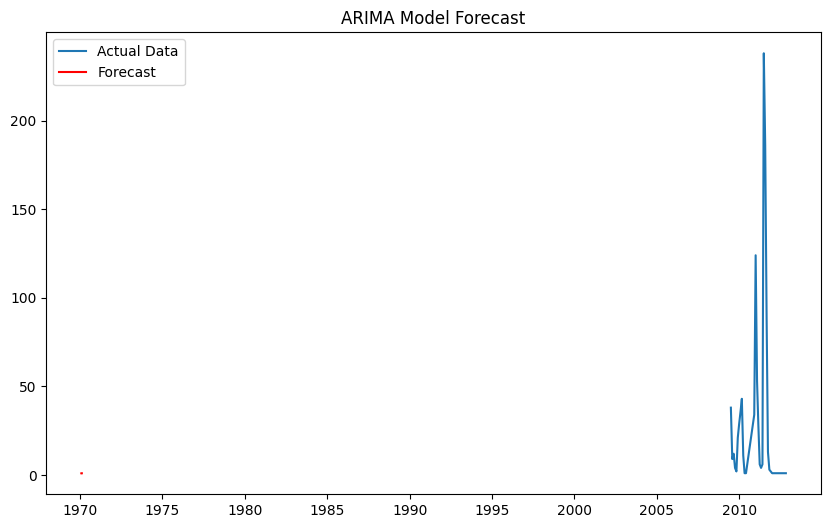

In [83]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare the data for ARIMA
# Assuming `monthly_orders` is a DataFrame containing monthly aggregated order data
# Replace 'Distinct Orders' with the appropriate column name in your dataset
arima_data = monthly_orders['Distinct Orders']

# Step 2: Fit the ARIMA model
# Define the ARIMA model with (p, d, q) parameters. Modify these parameters based on data behavior.
arima_model = ARIMA(arima_data, order=(1, 1, 1))  # Example: ARIMA(1, 1, 1)
arima_results = arima_model.fit()

# Step 3: Summary of the ARIMA model
print(arima_results.summary())

# Step 4: Make predictions
# Forecast the next 12 periods
forecast = arima_results.forecast(steps=12)
print("ARIMA Forecast for the next 12 periods:")
print(forecast)

# Step 5: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(arima_data, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()


In [84]:
forecast

27    0.961706
28    0.973649
29    0.969924
30    0.971086
31    0.970724
32    0.970837
33    0.970802
34    0.970813
35    0.970809
36    0.970810
37    0.970810
38    0.970810
Name: predicted_mean, dtype: float64

In [85]:
# Import SARIMAX from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 4: Develop SARIMA Model
sarima_data = SARIMAX(monthly_orders['Distinct Orders'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_sarima = sarima_data.fit()

# Step 3: Display the SARIMAX results summary
print(results_sarima.summary())


                                     SARIMAX Results                                      
Dep. Variable:                    Distinct Orders   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -78.059
Date:                            Sun, 08 Dec 2024   AIC                            166.118
Time:                                    19:21:09   BIC                            169.313
Sample:                                         0   HQIC                           165.822
                                             - 27                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5684      2.170      0.262      0.793      -3.685       4.822
ma.L1         -0.9998   2103.183   

In [86]:
# Step 5: Forecast the next 12 months
forecast = results_sarima.get_forecast(steps=12)
forecast_index = pd.date_range(start=monthly_orders.index[-1], periods=12, freq='M')
forecast_df = forecast.summary_frame()
forecast_df.index = forecast_index

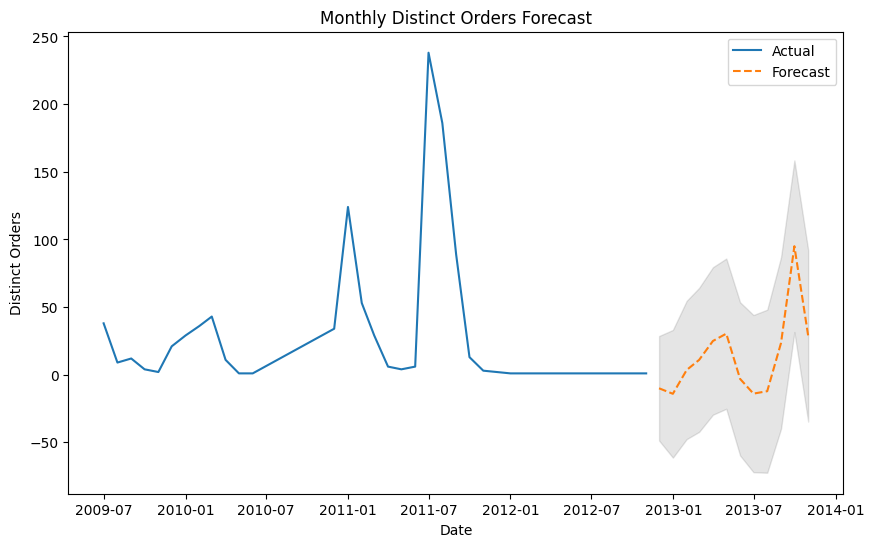

In [87]:
# Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['Distinct Orders'], label="Actual")
plt.plot(forecast_df['mean'], label="Forecast", linestyle='--')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='k', alpha=0.1)
plt.title("Monthly Distinct Orders Forecast")
plt.xlabel("Date")
plt.ylabel("Distinct Orders")
plt.legend()
plt.show()

In [88]:
# Evaluate the model using MAPE
fitted_values = results_sarima.fittedvalues
mape = mean_absolute_percentage_error(monthly_orders['Distinct Orders'][1:], fitted_values[1:])
print(f"MAPE: {mape:.2%}")

MAPE: 634.43%


In [89]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Delivery Month,Season,Lead Time,advanced_order,Season_Num,year_month
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1,Winter,199,1,1,2009-07
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,3,Spring,252,1,2,2009-07
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2,Winter,203,1,1,2009-07
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2,Winter,202,1,1,2009-07
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2,Winter,195,1,1,2009-07


In [ ]:
from sklearn.preprocessing import LabelEncoder


features = ['order_date', 'requested_delivery_date', 'Customer Country Code', 'order_type', 'Customer Order Code',
            'Curr', 'items', 'Route', 'year_month',
            'Delivery Month', 'Season', 'Lead Time', 'advanced_order']

X = df[features]
y = df['Product Code']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

categorical_features = ['Season', 'Customer Country Code', 'Route', 'advanced_order']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_features = ['Lead Time', 'items', 'value']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [92]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])

In [93]:
nan_values = df.isna().sum()
print("NaN values per column:")
print(nan_values)

NaN values per column:
order_date                 0
requested_delivery_date    0
Customer Country Code      0
Product Code               0
Description                0
order_type                 0
Customer Order Code        0
value                      0
Curr                       0
items                      0
Route                      0
Delivery Month             0
Season                     0
Lead Time                  0
advanced_order             0
Season_Num                 0
year_month                 0
dtype: int64


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 2419
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2417 non-null   datetime64[ns]
 1   requested_delivery_date  2417 non-null   datetime64[ns]
 2   Customer Country Code    2417 non-null   object        
 3   Product Code             2417 non-null   object        
 4   Description              2417 non-null   object        
 5   order_type               2417 non-null   object        
 6   Customer Order Code      2417 non-null   int64         
 7   value                    2417 non-null   float64       
 8   Curr                     2417 non-null   object        
 9   items                    2072 non-null   float64       
 10  Route                    2417 non-null   object        
 11  Delivery Month           2417 non-null   int32         
 12  Season                   2417 non-null 

In [96]:
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)
model.fit(X_train, y_train)

y_pred_probs = model.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

ValueError: could not convert string to float: '\\N'

In [98]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

probabilities = model.predict_proba(X)

prob_cols = [f'prob_{code}' for code in le.classes_]
df_probs = pd.DataFrame(probabilities, columns=prob_cols, index=X.index)

df_with_probs = df.join(df_probs)

seasonal_choice_probabilities = df_with_probs.groupby('Season')[prob_cols].mean()

print(seasonal_choice_probabilities)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

NameError: name 'y_pred' is not defined

In [100]:
X

,order_date,requested_delivery_date,Customer Country Code,Description,order_type,Customer Order Code,value,Curr,items,Route,year_month,Delivery Month,Season,Lead Time,advanced_order
0,2009-07-13,2010-01-28,RU,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,2009-07,1,Winter,199,1
1,2009-07-15,2010-03-24,RU,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,2009-07,3,Spring,252,1
2,2009-07-16,2010-02-04,RU,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,2009-07,2,Winter,203,1
3,2009-07-17,2010-02-04,RU,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,2009-07,2,Winter,202,1
4,2009-07-21,2010-02-01,RU,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,2009-07,2,Winter,195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,2011-07,2,Winter,217,1
2416,2011-07-13,2012-02-15,HR,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,2011-07,2,Winter,217,1
2417,2011-07-13,2012-02-15,HR,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,2011-07,2,Winter,217,1
2418,2011-07-13,2012-02-15,HR,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,2011-07,2,Winter,217,1


In [ ]:
df

Q. No. 3

In [101]:
from scipy.stats.mstats import mquantiles

In [103]:
# Group by Product Code and compute quantiles for quantity demanded ('Items')
quantile_data = df.groupby('Product Code')['items'].apply(
    lambda x: pd.Series(mquantiles(x, prob=[0.25, 0.5, 0.75], alphap=0.4, betap=0.4), index=['25th', '50th', '75th'])
).unstack()

In [104]:
# Reset the index for better presentation
quantile_data = quantile_data.reset_index()

In [105]:
# Display the quantile data as a table
print(quantile_data)

   Product Code  25th  50th   75th
0     L10705000  5.00   6.0  10.20
1     L10705100  6.00   9.0  13.05
2     L10705200  5.00   6.0  10.00
3     L10705300  5.00   7.0  10.00
4     L10705400  8.00  14.0    NaN
5     L10705500  5.00   8.5  13.10
6     L10705600  5.00   7.5   8.00
7     L10705700  3.95   6.5   8.25
8     L10850600  3.00   5.5  10.05
9     L10850700  1.00   2.0   5.05
10    L10850800  2.95   4.0   6.10
11    L10850900  3.95   5.0  11.00
12    L10852800  2.00   4.0   8.00
13    L10852900  1.00   3.0   6.00
14    L10853100  4.40   6.0   6.00
15    L12134400  5.00   7.0  17.05
16    L12134500  2.95   7.0  14.00
17    L12134600  4.00   7.0  11.00
18    L12134700  3.00   5.0  10.00
19    L12135800  7.00   7.0   8.00
20    L12135900  3.00   5.0   7.00
21    L12136000  2.00   3.0   6.00
22    L12136100  6.00   7.0   8.00
23    L12916800  5.00  10.0    NaN
24    L12916900  4.00   6.0  12.00
25    L12917000  3.00   4.0   7.00
26    L12917100  4.00   4.0   8.40
27    L12917700  5.0

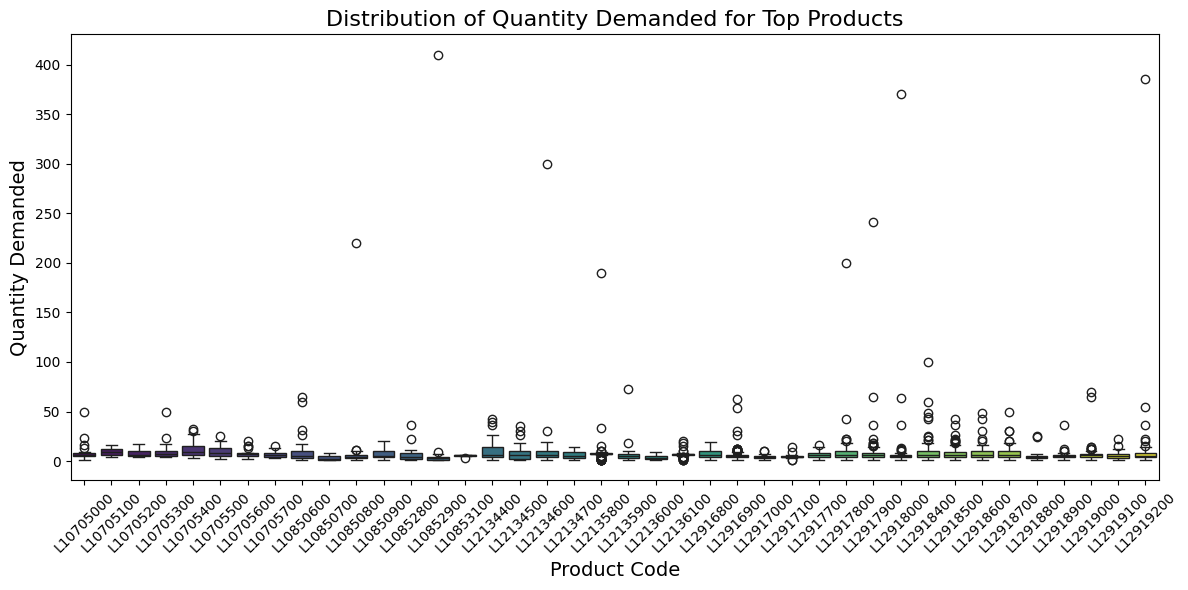

In [107]:
# Focus on the top 10 most ordered products for better readability
top_products = df['Product Code'].unique()
filtered_data = df[df['Product Code'].isin(top_products)]

# Create a boxplot for the top products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Code', y='items', data=filtered_data, palette='viridis')
plt.title("Distribution of Quantity Demanded for Top Products", fontsize=16)
plt.xlabel("Product Code", fontsize=14)
plt.ylabel("Quantity Demanded", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate product codes for better readability
plt.tight_layout()
plt.show()

In [108]:
# Step 2: Group by Product Code and compute quantiles for lead time
lead_time_quantiles = df.groupby('Product Code')['Lead Time'].apply(
    lambda x: pd.Series(mquantiles(x, prob=[0.25, 0.5, 0.75], alphap=0.4, betap=0.4), index=['25th', '50th', '75th'])
).unstack()

# Reset the index for better readability
lead_time_quantiles = lead_time_quantiles.reset_index()

In [109]:
lead_time_quantiles

,Product Code,25th,50th,75th
0,L10705000,181.70,195.0,203.60
1,L10705100,190.85,200.0,206.40
2,L10705200,191.00,195.0,202.10
3,L10705300,192.00,198.0,203.90
4,L10705400,189.35,199.0,203.55
5,L10705500,188.00,192.0,196.00
6,L10705600,189.35,197.5,203.55
7,L10705700,187.85,191.5,204.30
8,L10850600,177.95,211.5,231.30
9,L10850700,172.85,214.0,224.20


In [110]:
# Display the quantile data as a table
print(lead_time_quantiles)

   Product Code    25th   50th    75th
0     L10705000  181.70  195.0  203.60
1     L10705100  190.85  200.0  206.40
2     L10705200  191.00  195.0  202.10
3     L10705300  192.00  198.0  203.90
4     L10705400  189.35  199.0  203.55
5     L10705500  188.00  192.0  196.00
6     L10705600  189.35  197.5  203.55
7     L10705700  187.85  191.5  204.30
8     L10850600  177.95  211.5  231.30
9     L10850700  172.85  214.0  224.20
10    L10850800  166.95  187.5  218.10
11    L10850900  216.95  240.0  258.20
12    L10852800  188.00  225.0  237.00
13    L10852900  172.70  201.0  230.05
14    L10853100  239.80  260.0  299.50
15    L12134400  174.50  221.5  268.00
16    L12134500  147.45  226.5  269.20
17    L12134600  169.50  209.5  264.10
18    L12134700  181.45  196.0  218.25
19    L12135800  206.00  206.0  206.00
20    L12135900  182.00  208.5  234.40
21    L12136000  188.30  202.0  224.30
22    L12136100  206.00  206.0  229.00
23    L12916800  216.70  232.0  239.30
24    L12916900  203.70  

In [111]:
# Step 3: Visualize Lead Time Distribution for the Top Products
# Filter for top 10 products based on frequency
top_products = df['Product Code'].value_counts().head(10).index
filtered_data = df[df['Product Code'].isin(top_products)]

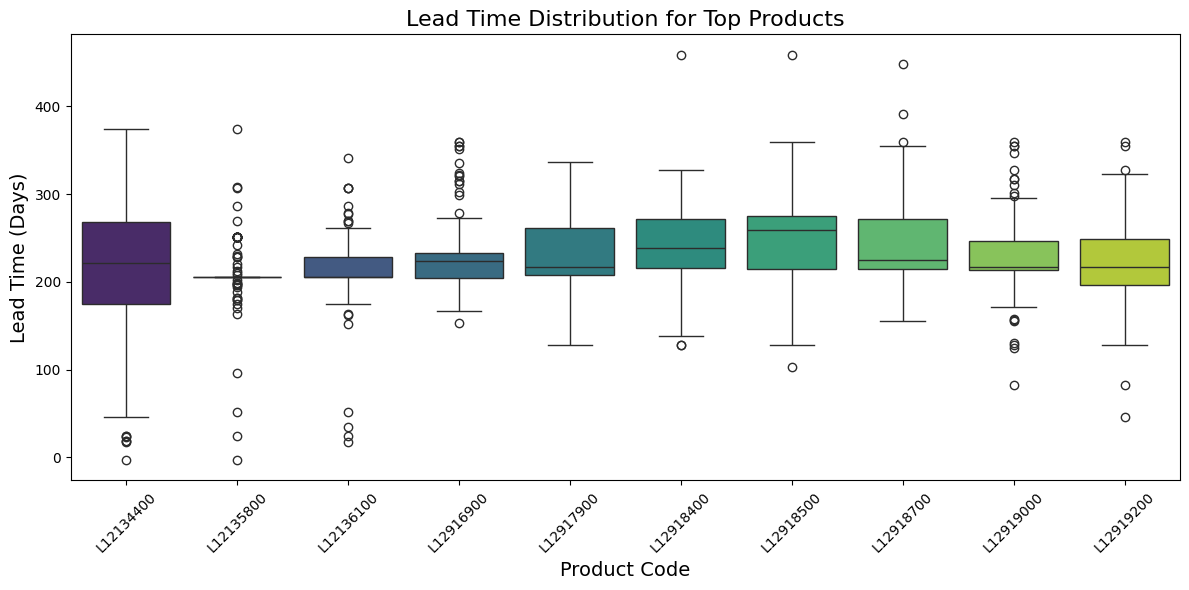

In [112]:
# Create a boxplot for lead time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Code', y='Lead Time', data=filtered_data, palette='viridis')
plt.title("Lead Time Distribution for Top Products", fontsize=16)
plt.xlabel("Product Code", fontsize=14)
plt.ylabel("Lead Time (Days)", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Q. No. 4

In [113]:
# Monte Carlo Simulation
# Define number of simulations
n_simulations = 1000

In [115]:
# Simulate random samples for lead time and quantity demanded
simulated_lead_times = np.random.choice(df['Lead Time'], size=n_simulations, replace=True)
simulated_quantities = np.random.choice(df['items'], size=n_simulations, replace=True)

In [116]:
# Consolidate simulation results
simulation_results = pd.DataFrame({
    'Simulated Lead Time': simulated_lead_times,
    'Simulated Quantity': simulated_quantities
})

In [117]:
# Step 4: Classify Demand as Advance or Urgent
# Define threshold for advance demand (e.g., > 30 days)
simulation_results['Demand Type'] = simulation_results['Simulated Lead Time'].apply(
    lambda x: 'Advance' if x > 30 else 'Urgent'
)

In [118]:
# Aggregate simulated demand by type
simulated_demand_summary = simulation_results.groupby('Demand Type')['Simulated Quantity'].sum()
print("Simulated Demand Summary:")
print(simulated_demand_summary)

Simulated Demand Summary:
Demand Type
Advance    6218.0
Urgent       70.0
Name: Simulated Quantity, dtype: float64


In [120]:
# Step 5: Compare Simulated Advance Demand with Actual Data
# Compute actual advance demand from dataset
actual_advance_demand = df[df['Lead Time'] > 30]['items'].sum()
simulated_advance_demand = simulated_demand_summary['Advance']

In [121]:
print(f"Actual Advance Demand: {actual_advance_demand}")
print(f"Simulated Advance Demand: {simulated_advance_demand}")

Actual Advance Demand: 16891.0
Simulated Advance Demand: 6218.0


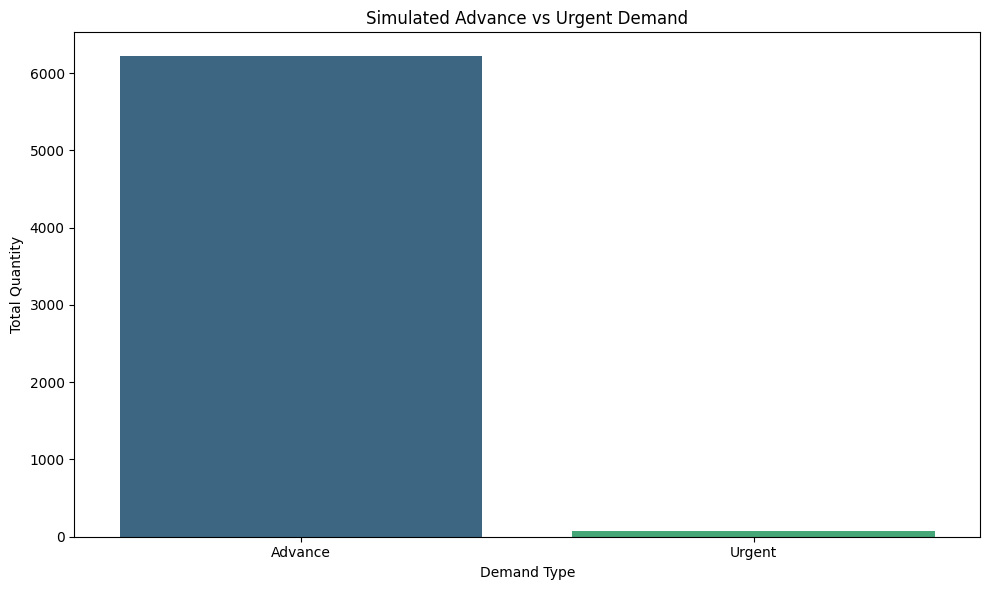

In [122]:
# Step 6: Visualize Results
plt.figure(figsize=(10, 6))
sns.barplot(x=simulated_demand_summary.index, y=simulated_demand_summary.values, palette='viridis')
plt.title("Simulated Advance vs Urgent Demand")
plt.xlabel("Demand Type")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()